In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import numpy as np

lyrics = pd.read_json('./datasets/eurovision-lyrics-2022.json')
eurovision = pd.read_csv('./datasets/eurovision.csv')
general = pd.read_csv('./datasets/general_lyrics.csv')
# jury = pd.read_csv('./datasets/jury.csv')
points = pd.read_csv('./datasets/point_diff.csv')
features = pd.read_csv('./datasets/spotify_audio_features.csv')
vote = pd.read_csv('./datasets/voteToFrom.csv')

In [3]:
#Who was the first winner

year = eurovision['year'].min()
winners = eurovision[eurovision['winner'] == True]

firstWinner = winners[winners['year'] == year].artist.item()
country = winners[winners['year'] == year].artist_country.item()

print("-First Eurovision Contest organization was at", year, ". The First Winner of Eurovision is ", firstWinner," from ", country,".")

-First Eurovision Contest organization was at 1956 . The First Winner of Eurovision is  Lys Assia  from  Switzerland .


In [4]:
#find the max margin between winner and runner-up

df = points.copy()
df2 = df['Margin'].replace('Not announced', "0").replace('No runner-up', "0")
df3 = df2.astype(int) 

print("-Biggest margin in contest is ", df3.max(), ".")


-Biggest margin in contest is  169 .


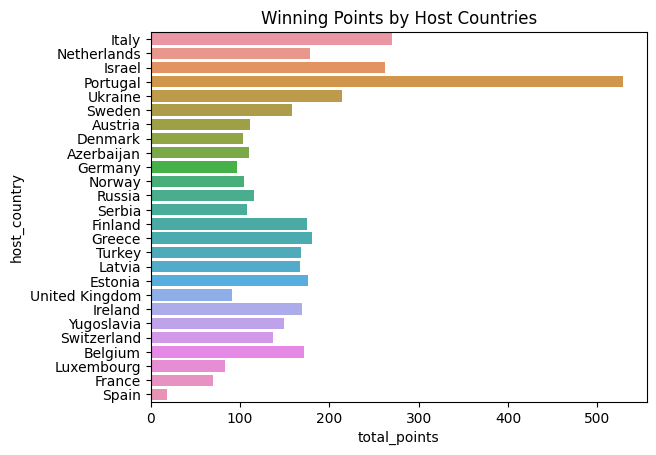

In [5]:
#winning points by host countries

winner = eurovision.loc[eurovision['winner'] == True]

sb.barplot(data=winner, y=winner['host_country'], x=winner['total_points'], errorbar = None)
plt.title("Winning Points by Host Countries")
plt.show()

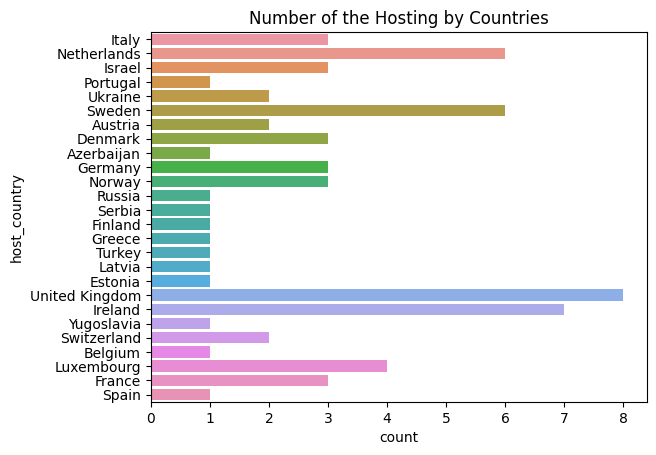

In [6]:
#number of the hosting by countries

host = eurovision.drop_duplicates(subset=['year', 'host_country'])
sb.countplot(y='host_country', data= host)
plt.title("Number of the Hosting by Countries")
plt.show()

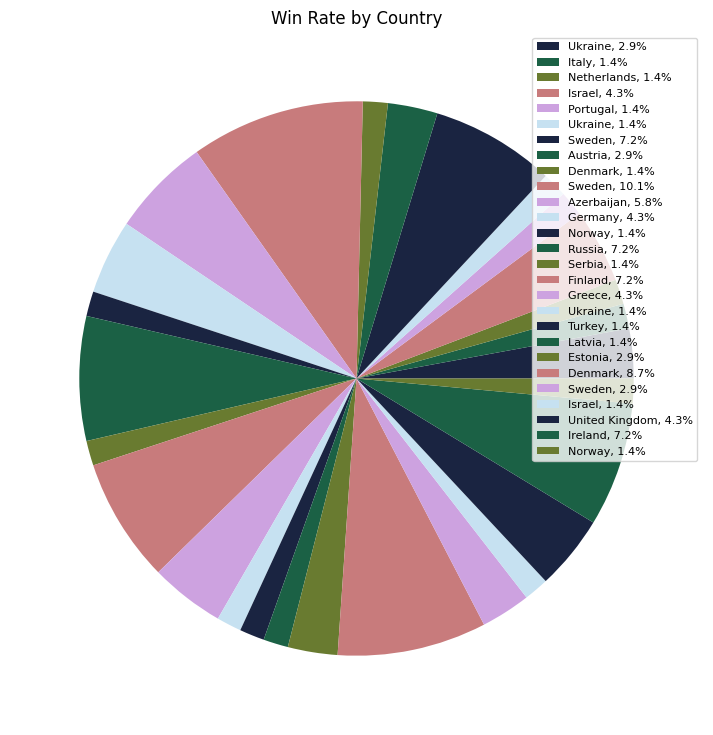

In [7]:
#win rate by country

winners = eurovision[eurovision['winner'] == True]
winners1 = winners[winners['section'] == 'grand-final']
winners2 = winners[winners['section'] == 'final']
winners = [winners1, winners2]
winners = pd.concat(winners)

color = sb.color_palette("cubehelix")
fig1, ax1 = plt.subplots(figsize=(9, 9))
labels = ["%s" % i for i in winners['artist_country']]
plt.pie(winners.groupby(['artist_country']).size(), colors=color)

total = sum(winners.groupby(['artist_country']).size())
plt.title("Win Rate by Country")
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, winners.groupby(['artist_country']).size())],
    prop={'size': 8},
    bbox_transform=fig1.transFigure
)
plt.show()

In [8]:
#win rate of Turkey

winners = eurovision[eurovision['winner'] == True]
winners1 = winners[winners['section'] == 'grand-final']
winners2 = winners[winners['section'] == 'final']
winners = [winners1, winners2]
winners = pd.concat(winners)

turkey = winners[winners.artist_country == "Turkey"]

turkey

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
1110,Riga 2003,Riga,2003,Latvia,https://eurovision.tv/event/riga-2003,final,Sertab Erener,Everyway That I Can,https://eurovision.tv/participant/sertab-erener,https://static.eurovision.tv/hb-cgi/images/905...,Turkey,:flag_tr:,4.0,167.0,1.0,1st,False,True
